# Accept–Reject Individual Run Comparison
Compare beta-series vs traditional accept-minus-reject effect size maps for one subject/run.

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from nilearn.maskers import NiftiMasker

from dd_kable_analysis.config_loader import load_config


In [6]:
# --- Choose subject/run here ---
sub_id = 'dmp0019'
run = '3'

cfg = load_config()
output_root = Path(cfg.output_root)

beta_map = (
    output_root
    / 'beta_series'
    / 'first_level'
    / f'sub-{sub_id}'
    / 'contrast_estimates'
    / f'sub-{sub_id}_ses-scan1_task-{cfg.task_name}_run-{run}_contrast-ll_minus_ss_output-effectsize.nii.gz'
)

trad_map = (
    output_root
    / 'traditional_model'
    / 'first_level'
    / f'sub-{sub_id}'
    / 'contrast_estimates'
    / f'sub-{sub_id}_ses-scan1_task-{cfg.task_name}_run-{run}_contrast-ll_minus_ss_output-effectsize.nii.gz'
)

print(beta_map.exists())
print(trad_map.exists())

True
True


In [7]:
cfg.masks_dir

PosixPath('/oak/stanford/groups/russpold/users/buckholtz/DD_Kable/derivatives/masks')

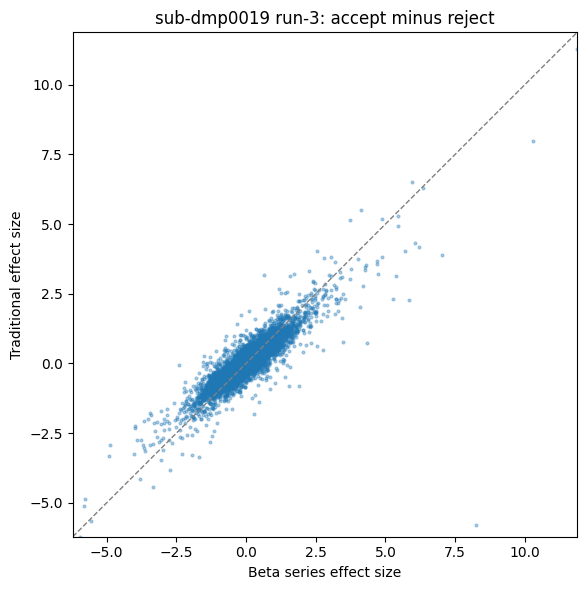

In [15]:
# group mask
mask_img = (
    cfg.masks_dir / 'assess_subject_bold_dropout/group_mask_intersection_30pct.nii.gz'
)
masker = NiftiMasker(mask_img=mask_img)
masker.fit()

beta_vals = masker.transform(beta_map).ravel()
trad_vals = masker.transform(trad_map).ravel()

n_vox = beta_vals.size
n_sample = min(10000, n_vox)
rng = np.random.default_rng(7)
sample_idx = rng.choice(n_vox, size=n_sample, replace=False)

plt.figure(figsize=(6, 6))
plt.scatter(beta_vals[sample_idx], trad_vals[sample_idx], s=4, alpha=0.35)

# Match axis limits and enforce square aspect
vals = np.concatenate([beta_vals[sample_idx], trad_vals[sample_idx]])
vmin, vmax = np.min(vals), np.max(vals)
plt.xlim(vmin, vmax)
plt.ylim(vmin, vmax)
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('Beta series effect size')
plt.ylabel('Traditional effect size')
plt.title(f'sub-{sub_id} run-{run}: accept minus reject')
plt.axline((0, 0), slope=1, linestyle='--', color='gray', linewidth=1)
plt.tight_layout()

In [18]:
# --- Run-level correlations across all good subject/run pairs ---
import pandas as pd

good_subs = pd.read_csv(
    cfg.subject_lists / 'initial_qa_pass_and_mask_pass_subjects_runs.csv'
)

corr_values = []
slope_values = []
mad_diff_values = []
corr_keys = []
missing = []


for _, row in good_subs.iterrows():
    sub_id = row['sub_id']
    run = str(row['run'])
    print(f'sub={sub_id}, run={run}')
    beta_map = (
        output_root
        / 'beta_series'
        / 'first_level'
        / f'sub-{sub_id}'
        / 'contrast_estimates'
        / f'sub-{sub_id}_ses-scan1_task-{cfg.task_name}_run-{run}_contrast-ll_minus_ss_output-effectsize.nii.gz'
    )
    trad_map = (
        output_root
        / 'traditional_model'
        / 'first_level'
        / f'sub-{sub_id}'
        / 'contrast_estimates'
        / f'sub-{sub_id}_ses-scan1_task-{cfg.task_name}_run-{run}_contrast-ll_minus_ss_output-effectsize.nii.gz'
    )

    if not beta_map.exists() or not trad_map.exists():
        missing.append((sub_id, run))
        continue

    beta_vals = masker.transform(beta_map).ravel()
    trad_vals = masker.transform(trad_map).ravel()

    if beta_vals.size == 0 or trad_vals.size == 0:
        missing.append((sub_id, run))
        continue

    corr = np.corrcoef(beta_vals, trad_vals)[0, 1]
    slope, intercept = np.polyfit(trad_vals, beta_vals, 1)
    mad_diff = np.median(np.abs(beta_vals - trad_vals))

    corr_values.append(corr)
    slope_values.append(slope)
    mad_diff_values.append(mad_diff)
    corr_keys.append((sub_id, run))

print(f'Computed correlations: {len(corr_values)}')
print(f'Missing pairs: {len(missing)}')
corr_values[:5]

sub=dmp0011, run=1
sub=dmp0011, run=2
sub=dmp0011, run=3
sub=dmp0011, run=4
sub=dmp0019, run=1
sub=dmp0019, run=2
sub=dmp0019, run=3
sub=dmp0019, run=4
sub=dmp0048, run=1
sub=dmp0048, run=2
sub=dmp0048, run=3
sub=dmp0048, run=4
sub=dmp0060, run=2
sub=dmp0060, run=3
sub=dmp0060, run=4
sub=dmp0062, run=1
sub=dmp0062, run=2
sub=dmp0062, run=3
sub=dmp0062, run=4
sub=dmp0063, run=1
sub=dmp0063, run=2
sub=dmp0063, run=3
sub=dmp0063, run=4
sub=dmp0090, run=1
sub=dmp0090, run=2
sub=dmp0090, run=3
sub=dmp0090, run=4
sub=dmp0095, run=1
sub=dmp0095, run=2
sub=dmp0095, run=3
sub=dmp0095, run=4
sub=dmp0097, run=1
sub=dmp0097, run=2
sub=dmp0097, run=3
sub=dmp0097, run=4
sub=dmp0098, run=1
sub=dmp0098, run=2
sub=dmp0098, run=3
sub=dmp0098, run=4
sub=dmp0106, run=2
sub=dmp0106, run=3
sub=dmp0106, run=4
sub=dmp0109, run=1
sub=dmp0109, run=2
sub=dmp0109, run=3
sub=dmp0109, run=4
sub=dmp0115, run=1
sub=dmp0115, run=2
sub=dmp0115, run=3
sub=dmp0115, run=4
sub=dmp0118, run=1
sub=dmp0118, run=2
sub=dmp0118,

[np.float64(0.8583583222281819),
 np.float64(0.8421786927128094),
 np.float64(0.8745899416404243),
 np.float64(0.906469030179785),
 np.float64(0.9116959534663943)]

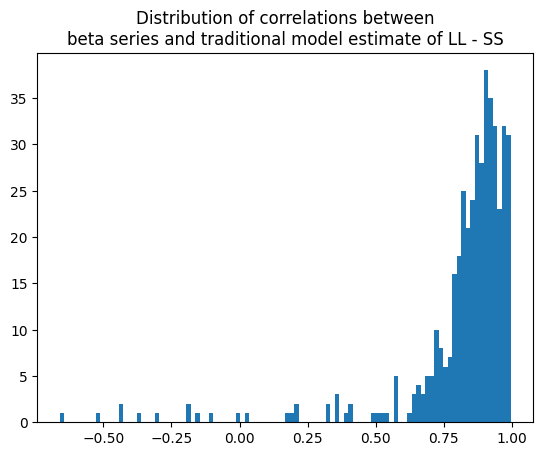

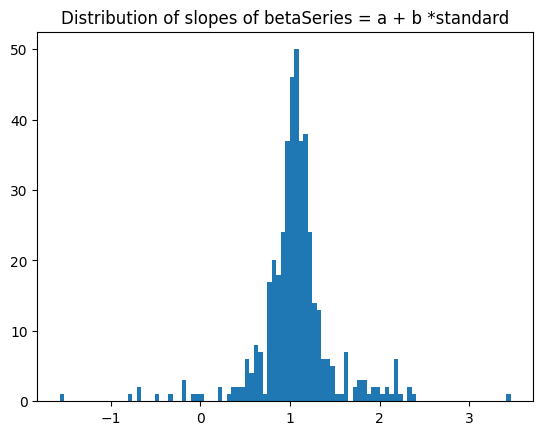

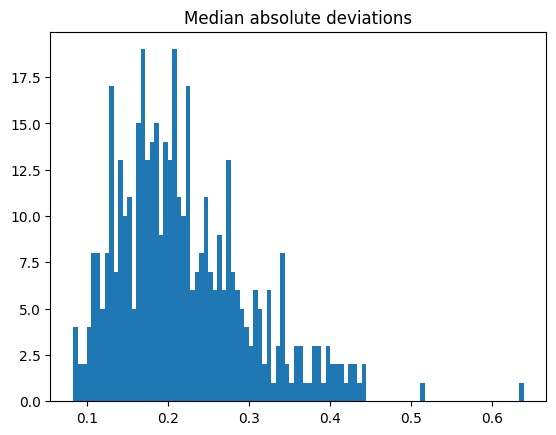

In [22]:
plt.hist(corr_values, bins=100)
plt.title(
    'Distribution of correlations between\nbeta series and traditional model estimate of LL - SS'
)
plt.show()


plt.hist(slope_values, bins=100)
plt.title('Distribution of slopes of betaSeries = a + b *standard')
plt.show()

plt.hist(mad_diff_values, bins=100)
plt.title('Median absolute deviations')
plt.show()